In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
df_hw02 = df[["ram", "storage", "screen", "final_price"]]

<Axes: xlabel='final_price', ylabel='Count'>

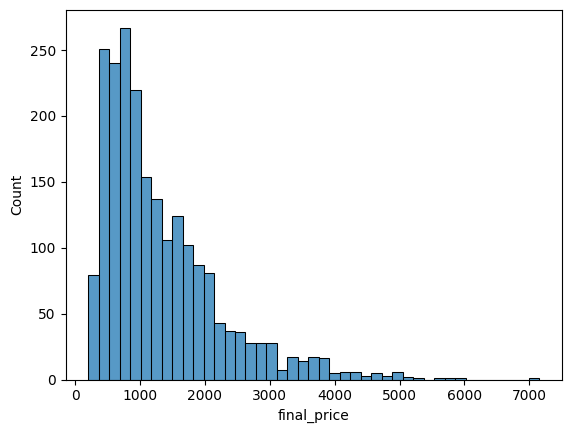

In [60]:
import seaborn as sns

sns.histplot(df_hw02.final_price)

In [52]:
#Q1
#There's one column with missing values. What is it?
#'ram'
#'storage'
#'screen'
#'final_price'

print(f"A1: The column with missing values is '{df_hw02.columns[df_hw02.isna().sum()>0][0]}'")

Q1: The column with missing values is 'screen'


In [53]:
#Q2 What's the median (50% percentile) for variable 'ram'?

print(f"A2: The median value for varibale 'ram' is {df_hw02.ram.median()} ")

A2: The median value for varibale 'ram' is 16.0 


In [235]:
n = len(df_hw02)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

(n_val, n_test, n_train)

(432, 432, 1296)

In [247]:
import numpy as np

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df_hw02.iloc[idx[:n_train]]
df_val = df_hw02.iloc[idx[n_train: n_train + n_val]]
df_test = df_hw02.iloc[idx[n_train + n_val:] ]


In [248]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]



In [249]:
X_train_opt1=np.array(df_train.drop(columns='final_price').fillna(0))
y_train_opt1 =np.array(df_train.final_price)
X_val_opt1=np.array(df_val.drop(columns='final_price').fillna(0))
y_val_opt1 =np.array(df_val.final_price)

screen_mean = df_train.screen.mean()
X_train_opt2=np.array(df_train.drop(columns='final_price').fillna(screen_mean))
y_train_opt2 =np.array(df_train.final_price)
X_val_opt2=np.array(df_val.drop(columns='final_price').fillna(screen_mean))
y_val_opt2 =np.array(df_val.final_price)

In [250]:
w0_opt1, w_opt1 = train_linear_regression(X_train_opt1,y_train_opt1)
w0_opt2, w_opt2 = train_linear_regression(X_train_opt2,y_train_opt2)

In [251]:
y_pred_opt1 = w0_opt1 + X_val_opt1.dot(w_opt1)
y_pred_opt2 = w0_opt2 + X_val_opt2.dot(w_opt2)

<Axes: ylabel='Count'>

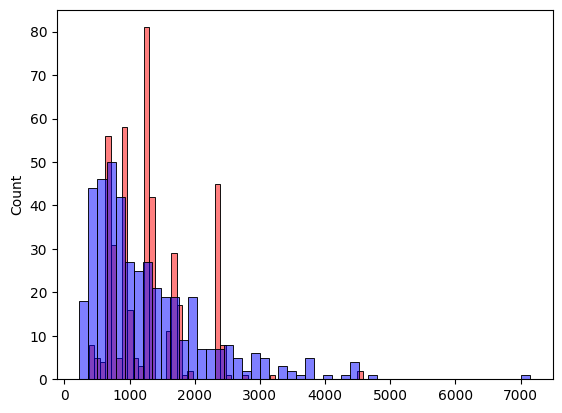

In [252]:
sns.histplot(y_pred_opt1, color='red', alpha = 0.5, bins=50)
sns.histplot(y_val_opt1, color='blue', alpha = 0.5, bins=50)

<Axes: ylabel='Count'>

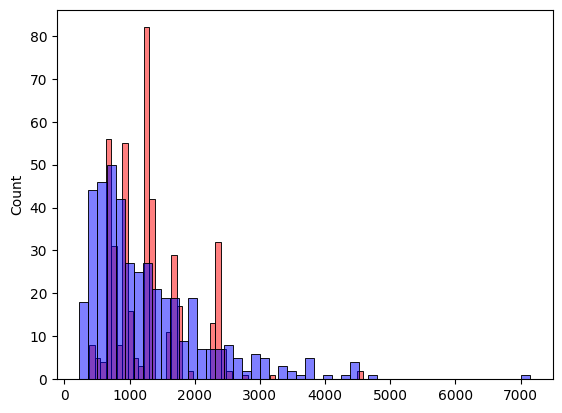

In [253]:
sns.histplot(y_pred_opt2, color='red', alpha = 0.5, bins=50)
sns.histplot(y_val_opt2, color='blue', alpha = 0.5, bins=50)

In [254]:
def rmse(y_pred, y):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [255]:

if round(rmse(y_pred_opt1, y_val_opt1),2) > round(rmse(y_pred_opt2, y_val_opt2),2):
    print("A3 Option with fillna mean is better")
else:
    print("A3: Option with fillna 0 is better ")

A3: Option with fillna 0 is better 


In [256]:
def train_linear_regression_reg(X,y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0]) 
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]


In [304]:
#Question 4 regularized linear regression
#Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
q4 = {}
X_train_r =np.array(df_train.drop(columns='final_price').fillna(0))
y_train_r =np.array(df_train.final_price)
X_val_r=np.array(df_val.drop(columns='final_price').fillna(0))
y_val_r=np.array(df_val.final_price)
r_list = [0, 0.01, 1, 10, 100]

for r in r_list :
    w0_r, w_r = train_linear_regression_reg(X_train_r, y_train_r, r=r)
    y_pred_r = w0_r + X_val_r.dot(w_r)
    q4[r] = round(rmse(y_pred_r, y_val_r),2)

   

In [305]:
best_r = sorted(q4.items(), key=lambda item: item[1], reverse=False)[0][0]
print(f"A4 of the given list {r_list} the value for r of '{best_r}' gives the best RMSE")


A4 of the given list [0, 0.01, 1, 10, 100] the value for r of '0' gives the best RMSE


In [269]:
def prepare_test_val_train(seed, train=0.6, test=0.2, val=0.2, df= df_hw02):
    n = len(df)
    n_val = int(val * n)
    n_test = int(test * n)
    n_train = n - n_val - n_test    
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train: n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:] ]
    return df_val, df_test, df_train

In [272]:
rmse_by_seed = []
seed_list = [0,1,2,3,4,5,6,7,8,9]

for seed in seed_list:
    df_val,_, df_train = prepare_test_val_train(seed=seed)
    X_train = np.array(df_train.drop(columns='final_price').fillna(0))
    X_val = np.array(df_val.drop(columns='final_price').fillna(0))
    y_train = np.array(df_train.final_price)
    y_val = np.array(df_val.final_price)
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    rmse_by_seed.append(rmse(y_pred, y_val))
    
    

In [275]:
print(f"A5 : The value of std is {round(np.std(rmse_by_seed),3)}")

A5 : The value of std is 29.176


In [298]:
rmse_by_seed = []
seed_list = [9]

for seed in seed_list:
    df_val,df_test, df_train = prepare_test_val_train(seed=seed)
    X_train = np.array(df_train.drop(columns='final_price').fillna(0))
    X_val = np.array(df_val.drop(columns='final_price').fillna(0))
    X_test = np.array(df_test.drop(columns='final_price').fillna(0))
    y_train = np.array(df_train.final_price)
    y_val = np.array(df_val.final_price)
    y_test = np.array(df_test.final_price)
    w0, w = train_linear_regression_reg(np.row_stack([X_train, X_val]), np.hstack((y_train,y_val)), r=0.001)
    y_pred = w0 + X_test.dot(w)
    rmse_by_seed.append(rmse(y_pred, y_test))

/var/folders/q0/syww6cyx7h90jjrq03z64drm0000gp/T/ipykernel_4204/409052740.py:12: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  w0, w = train_linear_regression_reg(np.row_stack([X_train, X_val]), np.hstack((y_train,y_val)), r=0.001)


In [303]:
# ... existing code ...

# Print the RMSE value with a descriptive message
print(f"A6: The RMSE for the test set with seed 9 is: {round(rmse_by_seed[0],2)}")

# ... existing code ...

A6: The RMSE for the test set with seed 9 is: 608.61
